In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
#J'importe le dataset Mnist

In [5]:
mnist = tf.keras.datasets.mnist 
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

In [7]:
X_train.shape # On aura 60,000 images et chaque image est representé par une matrice 28x28 dans le train

(60000, 28, 28)

In [9]:
Y_train.shape

(60000,)

In [11]:
Y_train[1]

0

In [13]:
X_test.shape

(10000, 28, 28)

In [15]:
Y_test.shape

(10000,)

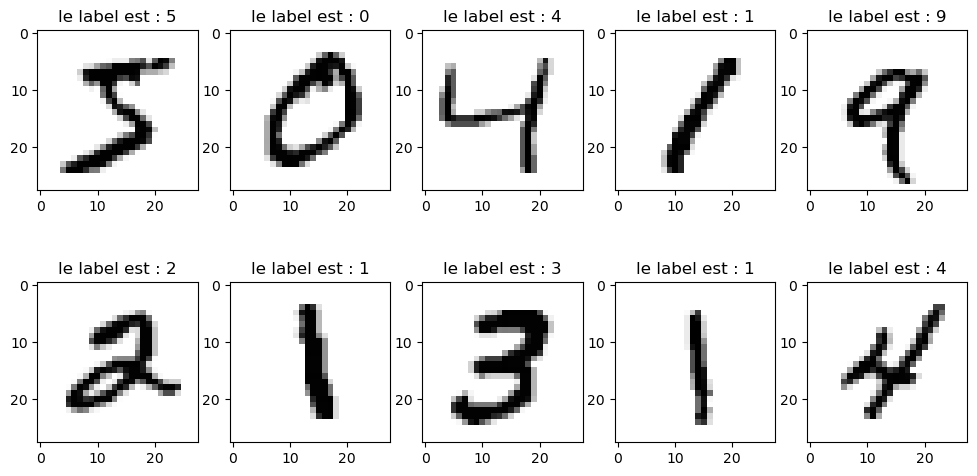

In [17]:
plt.figure(figsize =(12,6))
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap= plt.cm.gray_r, interpolation = "nearest")
    plt.title("le label est : %d" %Y_train[i])

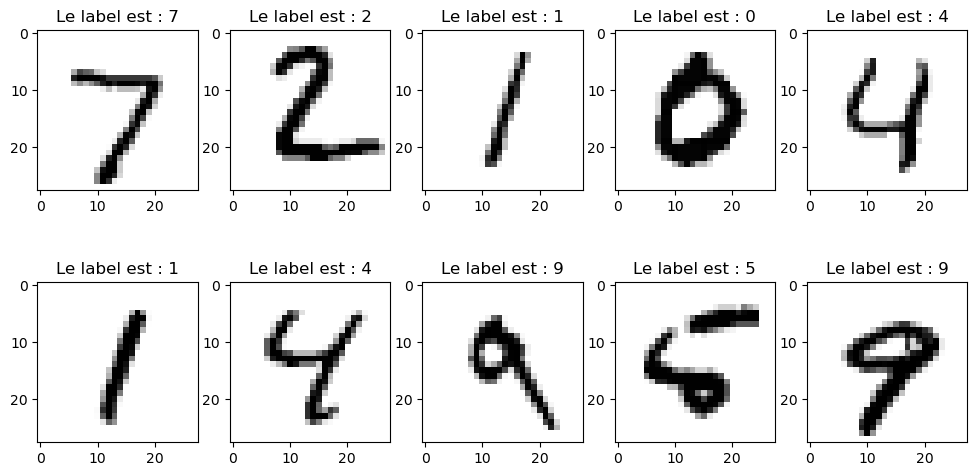

In [19]:
plt.figure(figsize=(12,6))
for j in range(0,10):
    plt.subplot(2,5, j+1)
    plt.imshow(X_test[j], cmap = plt.cm.gray_r, interpolation = "nearest")
    plt.title("Le label est : %d" %Y_test[j])

In [21]:
#Je reduit la taille de la base de donnés train de 30 fois
num_sample = X_train.shape[0]//30
indices = np.random.choice(X_train.shape[0], num_sample, replace = False)
X_train_reduced = X_train[indices]
Y_train_reduced = Y_train[indices]
Y_train_reduced.dtype

dtype('uint8')

In [23]:
X_train_reduced.shape

(2000, 28, 28)

In [25]:
Y_train_reduced.dtype

dtype('uint8')

In [27]:
X_train.dtype

dtype('uint8')

In [29]:
#J'ai filtré mes donnés en sorte d'avoir les classes 0,1,2
mask = np.isin(Y_train_reduced, [0, 1, 2])
X_train_filtred = X_train_reduced[mask]
Y_train_filtred = Y_train_reduced[mask]

In [31]:
X_train_filtred.shape

(639, 28, 28)

<span style="font-size:15px;">Une image est sous la forme d'une matrice 28x28, je souhaite l'aplatir pour avoir un vecteur de 784.    </span>

In [33]:
#Vectorisation
X_train_vectorized = X_train_filtred.reshape(X_train_filtred.shape[0], -1).astype("float32")

In [35]:
X_train_vectorized.shape

(639, 784)

In [37]:
X_train_vectorized.dtype

dtype('float32')

In [39]:
#Je normalise le vecteur
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_norm = scaler.fit_transform(X_train_vectorized)

In [41]:
X_train_norm.shape

(639, 784)

<span style="font-size:15px;">Je souhaite visualiser mes données  dans un graphique 2D</span>

In [43]:
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components= 2)
X_train_pca = pca.fit_transform(X_train_norm)

In [47]:
X_train_pca.shape

(639, 2)

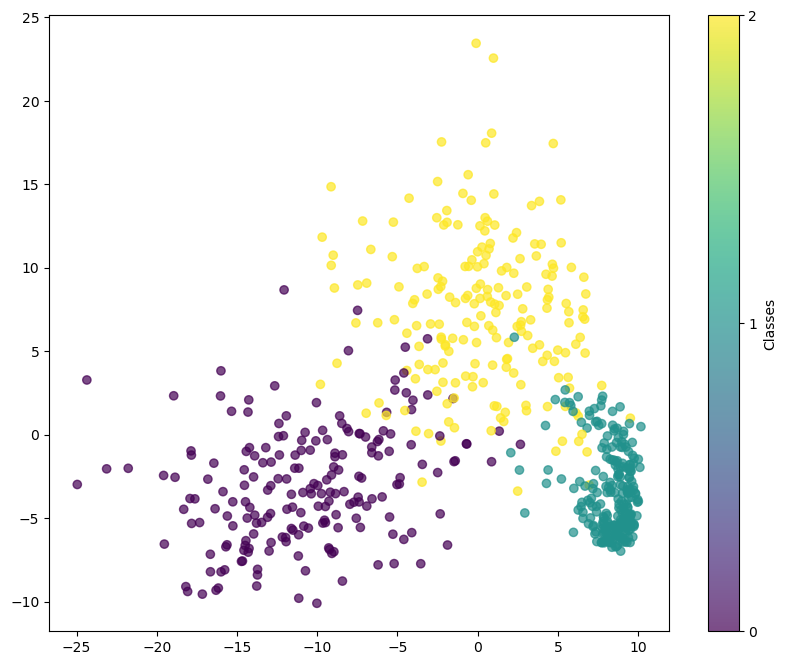

In [49]:
plt.figure(figsize=(10,8))
scatter= plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train_filtred, cmap="viridis", alpha =0.7)
plt.colorbar(scatter, ticks =[0,1,2], label ="Classes")

In [51]:
X_train_norm.shape

(639, 784)

In [53]:
Y_train_filtred.shape

(639,)

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
clf_gauss = SVC(kernel = "rbf", gamma = "scale", C=1.0)
clf_gauss.fit(X_train_norm, Y_train_filtred)

SVC()

<span style="font-size:15px;">J'utilise la méme procédure qu'avant pour la vectorisation et normalisation. </span>

In [60]:
num_sample_test = X_test.shape[0]//10
indices_test = np.random.choice(X_test.shape[0],num_sample_test, replace = False) 
Y_test_reduced = Y_test[indices_test]
X_test_reduced = X_test[indices_test]

In [62]:
mask_test = np.isin(Y_test_reduced, [0,1,2])
X_test_filtred = X_test_reduced[mask_test]
Y_test_filtred = Y_test_reduced[mask_test]

In [64]:
X_test_filtred.shape

(309, 28, 28)

In [66]:
X_test_vectorized = X_test_filtred.reshape(X_test_filtred.shape[0],-1)

In [68]:
X_test_vectorized.shape

(309, 784)

In [70]:
X_test_norm = scaler.fit_transform(X_test_vectorized).astype("float32")

In [72]:
X_test_norm.shape

(309, 784)

In [74]:
X_test_norm.dtype

dtype('float32')

In [76]:
Y_pred_test = clf_gauss.predict(X_test_norm)
accuracy_test = accuracy_score(Y_test_filtred, Y_pred_test)

In [78]:
print(f"Exactitude : {accuracy_test:.5f}")

Exactitude : 0.96440


In [80]:
#7. Calculeer l'erreur de prediction 
error_pred = 1 - accuracy_test

In [82]:
print(f"L'erreur de prediction pour les 3 classes est {error_pred:.5f}")

L'erreur de prediction pour les 3 classes est 0.03560


<span style="font-size:15px;">On observe une erreur de prédiction trés faible de 0.035, ce la veut dire que le modele a été bien entrainé sur le data train</span>

In [84]:
from sklearn.metrics import confusion_matrix

In [86]:
conf_matrix = confusion_matrix(Y_test_filtred, Y_pred_test)

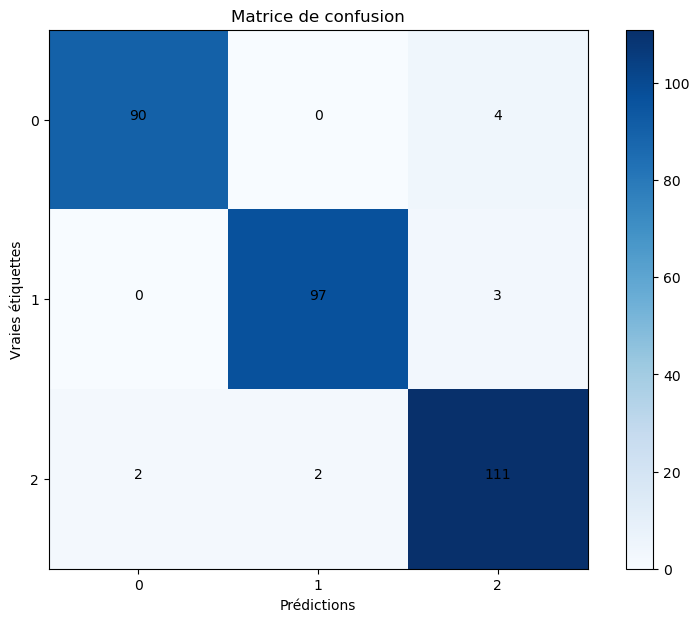

In [88]:
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(np.unique(Y_test_filtred)))
plt.xticks(tick_marks, np.unique(Y_test_filtred))
plt.yticks(tick_marks, np.unique(Y_test_filtred))
plt.ylabel('Vraies étiquettes')
plt.xlabel('Prédictions')

# Afficher les valeurs dans la matrice
for i in range(len(np.unique(Y_test_filtred))):
    for j in range(len(np.unique(Y_test_filtred))):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color="black")

plt.show()

<span style="font-size:15px;">Interpretation de la matrice de confusion: Poua la celule (0,0), on remarque que 93 instances de la classe "0" ont été atribué à la bonne classe.
La celule (1,2), on remarque que 3 instanceq de la calsse 1 à été attribué à la classe 2.</span>

<span style="font-size:20px;">Je compare mon resultat pour SVM avec CNN.</span>

In [99]:
from sklearn.preprocessing import StandardScaler

X_train_cnn = X_train_filtred[..., tf.newaxis]
X_test_cnn = X_test_filtred[..., tf.newaxis]

# Normaliser les données
# Redimensionner les images pour une meilleure compatibilité avec les CNN
X_train_cnn_norm = X_train_cnn / 255.0
X_test_cnn_norm = X_test_cnn / 255.0

# Créer le modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train_cnn_norm, Y_train_filtred, epochs=10, validation_data=(X_test_cnn_norm, Y_test_filtred))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test_cnn_norm, Y_test_filtred)
print(f"Précision pour les données de test : {test_acc:.5f}")

Epoch 1/10
20/20 [==============================] - 2s 44ms/step - loss: 0.7124 - accuracy: 0.8185 - val_loss: 0.1125 - val_accuracy: 0.9612
Epoch 2/10
20/20 [==============================] - 1s 38ms/step - loss: 0.0990 - accuracy: 0.9656 - val_loss: 0.0788 - val_accuracy: 0.9709
Epoch 3/10
20/20 [==============================] - 1s 32ms/step - loss: 0.0611 - accuracy: 0.9828 - val_loss: 0.0718 - val_accuracy: 0.9773
Epoch 4/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0572 - accuracy: 0.9844 - val_loss: 0.0598 - val_accuracy: 0.9871
Epoch 5/10
20/20 [==============================] - 1s 30ms/step - loss: 0.0312 - accuracy: 0.9922 - val_loss: 0.0714 - val_accuracy: 0.9838
Epoch 6/10
20/20 [==============================] - 1s 29ms/step - loss: 0.0241 - accuracy: 0.9937 - val_loss: 0.0775 - val_accuracy: 0.9773
Epoch 7/10
20/20 [==============================] - 1s 28ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0548 - val_accuracy: 0.9806
Epoch 8/10
20

In [110]:
X_train_cnn_norm.shape

(639, 28, 28, 1)

<span style="font-size:15px;">Si on compare avec SVM on a une légére amelioration d'aproximativement 0.01 pour l'accuracy.</span>

In [102]:
num_sample = X_train.shape[0]//10
indices = np.random.choice(X_train.shape[0], num_sample, replace = False)
X_train_reduced_1 = X_train[indices]
Y_train_reduced_1 = Y_train[indices]
num_sample_test = X_test.shape[0]//3
indices_test = np.random.choice(X_test.shape[0],num_sample_test, replace = False) 
Y_test_reduced_1 = Y_test[indices_test]
X_test_reduced_1 = X_test[indices_test]
Y_train_reduced.dtype

dtype('uint8')

In [104]:
mask_1 = np.isin(Y_train_reduced_1, [2,3,8,9])
mask_2 = np.isin(Y_test_reduced_1, [2,3,8,9])

In [106]:
#Je me restreint aux classes 2,3,8,9  pour le dataset Train
X_train_filtred_1 = X_train_reduced_1[mask_1]
Y_train_filtred_1 = Y_train_reduced_1[mask_1]

#Je me restreint aux classes 2,3,8 9 pour le dataset Test
X_test_filtred_1 = X_test_reduced_1[mask_2]
Y_test_filtred_1 = Y_test_reduced_1[mask_2]

In [108]:
X_test_filtred_1.shape

(1318, 28, 28)

In [114]:
#Vectorisation
X_train_vect_1 = X_train_filtred_1.reshape(X_train_filtred_1.shape[0],-1)
X_test_vect_1 = X_test_filtred_1.reshape(X_test_filtred_1.shape[0], -1)

In [116]:
#Normalisation des vecteurs
X_train_norm_1 = scaler.fit_transform(X_train_vect_1)
X_test_norm_1 = scaler.fit_transform(X_test_vect_1)

In [118]:
clf_gauss_1 = SVC(kernel ="rbf", gamma ="scale", C=1.0)
clf_gauss_1.fit(X_train_norm_1,Y_train_filtred_1)

SVC()

In [120]:
Y_pred_test_1 = clf_gauss_1.predict(X_test_norm_1)
accuracy_gauss_1 = accuracy_score(Y_test_filtred_1, Y_pred_test_1) 

In [122]:
accuracy_gauss_1
print(f"Exactitude est de : {accuracy_gauss_1:.5f}")

Exactitude est de : 0.94841


<span style="font-size:15px;">
En utilisant le SVM gaussien, l'augmentation du nombre de données et de classes a entraîné une diminution de notre exactitude de 0,02 par rapport aux classes (0, 1, 2), ce qui le rend légèrement moins précis.</span>

In [131]:
X_train_cnn_1 = X_train_filtred_1[..., tf.newaxis]
X_test_cnn_1 = X_test_filtred_1[..., tf.newaxis]

# Normaliser les données
# Redimensionner les images pour une meilleure compatibilité avec les CNN
X_train_cnn_norm_1 = X_train_cnn_1 / 255.0
X_test_cnn_norm_1 = X_test_cnn_1 / 255.0

# Créer le modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train_cnn_norm_1, Y_train_filtred_1, epochs=10, validation_data=(X_test_cnn_norm_1, Y_test_filtred_1))

# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test_cnn_norm_1, Y_test_filtred_1)
print(f"Précision pour les données de test : {test_acc:.5f}")


Epoch 1/10
74/74 [==============================] - 4s 38ms/step - loss: 0.5475 - accuracy: 0.8092 - val_loss: 0.1755 - val_accuracy: 0.9423
Epoch 2/10
74/74 [==============================] - 2s 24ms/step - loss: 0.1776 - accuracy: 0.9459 - val_loss: 0.1098 - val_accuracy: 0.9666
Epoch 3/10
74/74 [==============================] - 2s 28ms/step - loss: 0.1087 - accuracy: 0.9689 - val_loss: 0.1039 - val_accuracy: 0.9666
Epoch 4/10
74/74 [==============================] - 2s 31ms/step - loss: 0.0776 - accuracy: 0.9766 - val_loss: 0.0901 - val_accuracy: 0.9666
Epoch 5/10
74/74 [==============================] - 2s 28ms/step - loss: 0.0520 - accuracy: 0.9864 - val_loss: 0.0628 - val_accuracy: 0.9765
Epoch 6/10
74/74 [==============================] - 2s 27ms/step - loss: 0.0367 - accuracy: 0.9911 - val_loss: 0.0881 - val_accuracy: 0.9719
Epoch 7/10
74/74 [==============================] - 3s 35ms/step - loss: 0.0294 - accuracy: 0.9936 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 8/10
74

<span style="font-size:15px;">
Dans les deux cas, on peut remarquer que les couches de convolution offrent de meilleures prédictions. Ici, nous obtenons même une meilleure prédiction pour les classes (0, 1, 2) car nous avons augmenté le nombre de données dans les ensembles d'entraînement et de test, et sachant que les couches de convolution entraînent mieux le modèle lorsqu'il dispose d'un grand nombre de données.</span>